In [1]:
! apt-get -y update
! apt-get -y install unzip wget git

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease 
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]      
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]    
Get:5 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [898 kB]
Fetched 1150 kB in 1s (1362 kB/s)                          
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
git is already the newest version (1:2.17.1-1ubuntu0.7).
wget is already the newest version (1.19.4-1ubuntu2.2).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


In [2]:
! wget https://www.dropbox.com/s/zzrsxojedhc0wff/dataset.zip?dl=1

--2020-09-14 17:24:53--  https://www.dropbox.com/s/zzrsxojedhc0wff/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.71.1, 2620:100:6028:1::a27d:4701
Connecting to www.dropbox.com (www.dropbox.com)|162.125.71.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/zzrsxojedhc0wff/dataset.zip [following]
--2020-09-14 17:24:53--  https://www.dropbox.com/s/dl/zzrsxojedhc0wff/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd0bbff508571c8ecce0a55a9e3.dl.dropboxusercontent.com/cd/0/get/A_ZahcXp2PEpD54SmSubpGcnGF2tI4ETIr9LFOQJKTZ3pGQD_AQi0Ty2KICQq-dh4EtMotf9ssUjx23vlb-1nkY0fe7gHKzFaT3xeuYpoXHRsQB6k5JnfgRSQRYW7hqB4JE/file?dl=1# [following]
--2020-09-14 17:24:53--  https://ucd0bbff508571c8ecce0a55a9e3.dl.dropboxusercontent.com/cd/0/get/A_ZahcXp2PEpD54SmSubpGcnGF2tI4ETIr9LFOQJKTZ3pGQD_AQi0Ty2KICQq-dh4EtMotf9ssUjx23vlb-1nkY0fe7gHKzFaT3xeuYpoXHRsQB6

In [3]:
#! unzip dataset.zip

In [4]:
! ls -alh dataset | wc -l

2631


In [5]:
! pip install git+git://github.com/ternaus/TernausNet.git#egg=ternausnet

In [6]:
# help(ternausnet.models.UNet11)

In [7]:
# ! pip install scikit-learn

In [8]:
! pip install matplotlib

In [9]:
! pip install tqdm

In [10]:
! pip install Pillow

In [ ]:
! pip install yadisk

In [1]:
import os
import json

from PIL import Image

import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset
from torchvision import transforms

from sklearn.model_selection import train_test_split

import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
import numpy as np
np.random.seed(0)

from torch.optim import Adam
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from tqdm import tqdm

from livelossplot import PlotLosses

import ternausnet.models
model = ternausnet.models.UNet11(pretrained=True)

from lib.train import WaterDataset, viz, RandomRotate90, train_transform, test_transform

In [2]:
! ls datasets/landcover_processed/rotated_crops | head -4

M-33-20-D-c-4-2-1-0.png
M-33-20-D-d-3-3-100-20.png
M-33-20-D-d-3-3-106-20.png
M-33-20-D-d-3-3-11-30.png
ls: write error: Broken pipe


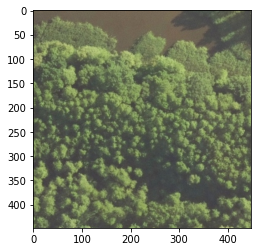

In [3]:
I = np.asarray(Image.open('datasets/landcover_processed/rotated_crops/M-33-20-D-d-3-3-130-20.png'))
plt.imshow(I[:, :, :3])

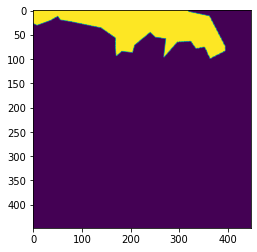

In [4]:
plt.imshow(I[:, :, 3])

In [5]:
list_dataset = os.listdir('datasets/landcover_processed/rotated_crops')
number_files = len(list_dataset)
print(number_files)

27307


In [6]:
train_img_list, test_img_list = train_test_split(list_dataset, test_size=0.15)

In [7]:
def add_path(path, old_list):
    #image_list = IMAGE_URLS_HEADER
    new_list = []
    for f in old_list:
        f =  path + f   
        new_list.append(f)
    return new_list

In [8]:
train_img_list2 = add_path('datasets/landcover_processed/rotated_crops/', train_img_list)
test_img_list2 = add_path('datasets/landcover_processed/rotated_crops/', test_img_list)

In [9]:
with open('train_img_list.json', 'w') as f:
    json.dump(train_img_list2, f)
    
with open('test_img_list.json', 'w') as f:
    json.dump(test_img_list2, f)

In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [14]:
d_train = WaterDataset('train_img_list.json', train_transform)
d_val = WaterDataset('test_img_list.json', test_transform)

In [15]:
pred = np.random.random(6).reshape(3,2)
gt = np.random.randint(0, 2, size=6).reshape(3,2)

pred, gt

threshold = 0.5

pred, gt, (pred > threshold) != gt.astype(np.bool), ((pred > threshold) != gt.astype(np.bool)).sum()

((gt == 1) & (pred > threshold)).sum() / (gt == 1).sum()

0.0

In [16]:
type(enumerate(dl_train))

NameError: name 'dl_train' is not defined

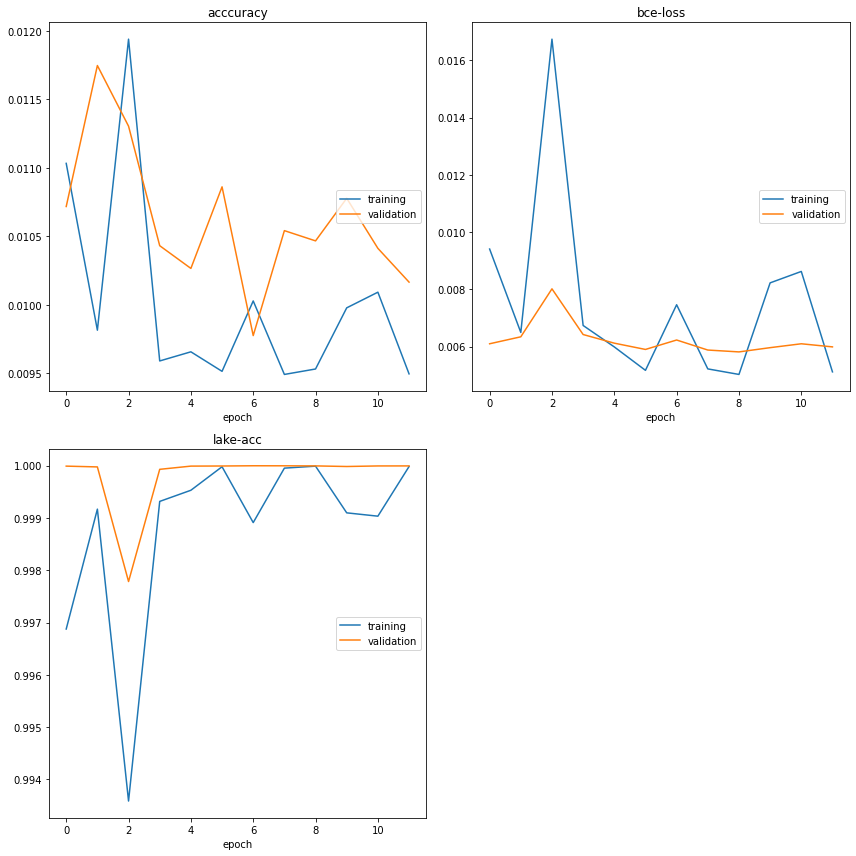

acccuracy
	training         	 (min:    0.009, max:    0.012, cur:    0.009)
	validation       	 (min:    0.010, max:    0.012, cur:    0.010)
bce-loss
	training         	 (min:    0.005, max:    0.017, cur:    0.005)
	validation       	 (min:    0.006, max:    0.008, cur:    0.006)
lake-acc
	training         	 (min:    0.994, max:    1.000, cur:    1.000)
	validation       	 (min:    0.998, max:    1.000, cur:    1.000)
train step


KeyboardInterrupt: 

In [17]:
loss = nn.BCEWithLogitsLoss()

optimizer = Adam(model.parameters())

dl_train = DataLoader(d_train, batch_size=4, shuffle=True, num_workers=4)

dl_val = DataLoader(d_val, batch_size=4, shuffle=False, num_workers=4)

num_epochs = 100

device = 'cuda:0'

model = model.to(device)

groups = {'acccuracy': ['acc', 'val_acc'], 'bce-loss': ['loss', 'val_loss'], 'lake-acc': ['lakeacc', 'val_lakeacc']}

plotlosses = PlotLosses(groups=groups)

topk_val_losses = {}

train_id = '123'

for epoch in range(num_epochs):
    print('train step')
    
    S_loss = 0
    S_accuracy = 0
    S_lake_accuracy = 0
    for idx, (im, gt) in enumerate(dl_train):
        im = im.to(device)
        gt = gt.to(device)
        optimizer.zero_grad()
        
        pred = model(im)
        L = loss(pred, gt)
        assert pred.shape == gt.shape
        treshold = 0.5
        accuracy = ((pred > threshold) != gt.bool()).sum().item() / pred.numel()
        lake_accuracy = ((gt == 1) & (pred > threshold)).sum().item() / (gt == 1).sum().item()
        #(pred[[]] - gt
        # print(L.item())
              #(pred > 0.5).sum())
        S_loss += L.item()
        S_accuracy += accuracy
        S_lake_accuracy += lake_accuracy
        L.backward()
        optimizer.step()
    train_loss = S_loss / (idx + 1)
    train_accuracy = S_accuracy/ (idx + 1)
    train_lake_accuracy = S_lake_accuracy/ (idx + 1)
    
        #if (idx % 10) == 0:
        #    pass # eval
        
    print('eval step')
    S_loss = 0
    S_accuracy = 0
    S_lake_accuracy = 0
    for idx, (im, gt) in enumerate(dl_val):
        im = im.to(device)
        gt = gt.to(device)
        pred = model(im)
        L = loss(pred, gt)
        # print(L.item())
        S_loss += L.item()
        treshold = 0.5
        accuracy = ((pred > threshold) != gt.bool()).sum().item() / pred.numel()
        lake_accuracy = ((gt == 1) & (pred > threshold)).sum().item() / (gt == 1).sum().item()
        S_accuracy += accuracy
        S_lake_accuracy += lake_accuracy
    val_loss = S_loss / (idx + 1)
    val_accuracy = S_accuracy/ (idx + 1)
    val_lake_accuracy = S_lake_accuracy/ (idx + 1)
    
    plotlosses.update({'val_loss': val_loss, 'loss': train_loss, 'val_acc': val_accuracy, 'acc': train_accuracy, 'lakeacc': train_lake_accuracy, 'val_lakeacc': val_lake_accuracy})
    plotlosses.send()
    
    if (len(topk_val_losses) < 5) or (val_loss < max(topk_val_losses.keys())):
        if (len(topk_val_losses) > 0) and (val_loss < max(topk_val_losses.keys())):
            argmin = max(topk_val_losses.keys())
            fname = topk_val_losses[argmin]
            os.remove(fname)
            del topk_val_losses[argmin]
        topk_val_losses[val_loss] = f'model-{train_id}-{epoch}.pth'
        torch.save(model.state_dict(), f'model-{train_id}-{epoch}.pth')
        
torch.save(model.state_dict(), 'model-latest.pth')

In [ ]:
def viz(model, 1, device)

In [ ]:
# res = viz(model, test_path, 'cuda:0')
# plt.imshow(res)

In [ ]:
# model.load_state_dict(torch.load("model-123-90.pth"))

In [ ]:
# res = viz(model, test_path, 'cuda:0')
# plt.imshow(res)